In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import database
reload(database)
db = database.thomas_18_db

In [3]:
figdir='/mnt/home/szheng/ceph/place_variability/fig/paper/figure_block_reuse/'
# figdir = os.path.join(figdir_root,'pv_corr')
figdir= misc.get_or_create_subdir(figdir)

In [4]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')

In [5]:
import fr_map_thomas_all_sess as fmtas
reload(fmtas)
import get_thomas_cell_metrics as gtcm
reload(gtcm)
import unimodal_nmf as unmf

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
%%time
reload(fmtas)
fr_map_all = fmtas.main(force_reload=False,load_only=True,dosave=False,bin_size=0.022,gauss_width=0.2,save_fn_one='fr_map_mask_True_smallbin_smallgauss.p',save_fn_all='fr_map_mask_True_smallbin_smallgauss.p')
# fr_map_all = fmtas.main(force_reload=False,load_only=False,dosave=False)
fr_map_trial_df_all = fr_map_all['fr_map_trial_df_all']

occu_map = fr_map_all['occu_map_all']

frmap = fr_map_all['fr_map_all']
fr_map_trial_all = fr_map_all['fr_map_trial_all']

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/fr_map_mask_True_smallbin_smallgauss.p exists; loading---
CPU times: user 348 ms, sys: 4.56 s, total: 4.91 s
Wall time: 52 s


In [7]:
# reshape fr_map_trial_df_all to make it easier to work with
fr_map_trial_df_all_day =fr_map_trial_df_all.unstack(level=2).swaplevel(0,1,axis=1).sort_index(axis=1) # day in column

fr_map_trial_df_all_per_uid=fr_map_trial_df_all.unstack(level=(2,3)).swaplevel(0,1,axis=1).swaplevel(1,2,axis=1).sort_index(axis=1).dropna(axis=1,how='all')

frmap_all_day = frmap.unstack(level=2).swaplevel(0,1,axis=1).sort_index(level=0,axis=1)

In [8]:
reload(gtcm)
reload(pa)
per_cell_metrics=gtcm.get_variability_metrics(frmap,occu_map,fr_map_trial_df_all)

/mnt/home/szheng/projects/util_code/place_cell_analysis.py:213: PerformanceWarning: indexing past lexsort depth may impact performance.
  frmap_one=frmap.loc[kk].dropna(axis=1)
/mnt/home/szheng/projects/util_code/place_cell_analysis.py:205: RuntimeWarning: invalid value encountered in true_divide
  div = (fr_map_v / fr_mean[:,None])


In [25]:
recon_null_all[(region,exp)] = res['recon_null'].T

0                                                              \
          0         1         2         3         4         5         6     
0    0.342662  0.583746  0.577345  0.539415  0.380291  0.494622  0.556974   
1    0.361069  0.589278  0.594765  0.534463  0.374426  0.521797  0.559941   
2    0.353244  0.619605  0.593696  0.548503  0.389385  0.490086  0.614541   
3    0.291733  0.609974  0.588150  0.547742  0.358590  0.495707  0.576345   
4    0.366486  0.594124  0.589528  0.557929  0.381449  0.517515  0.492461   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.355200  0.596893  0.586995  0.546144  0.375986  0.527669  0.555403   
996  0.324489  0.610521  0.583797  0.549825  0.384312  0.469365  0.481220   
997  0.334775  0.604421  0.590573  0.524573  0.382378  0.509689  0.573322   
998  0.356273  0.603773  0.582696  0.541825  0.355010  0.478327  0.556383   
999  0.334209  0.612838  0.588168  0.540498  0.378362  0.539795  0.479102   

                                   ...         1                      \
          7         8         9    ...       212       213       214   
0    0.453721  0.323013  0.224613  ...  0.366406  0.271492  0.470189   
1    0.476325  0.502945  0.203014  ...  0.362825  0.285644  0.468174   
2    0.447080  0.460293  0.203365  ...  0.347635  0.311162  0.433773   
3    0.472300  0.482199  0.223977  ...  0.312833  0.363178  0.455586   
4    0.449437  0.337369  0.218995  ...  0.393694  0.292566  0.439670   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.484475  0.399121  0.207231  ...  0.355453  0.298040  0.419432   
996  0.466068  0.406024  0.199190  ...  0.327418  0.332121  0.443358   
997  0.472260  0.403618  0.203922  ...  0.373799  0.317325  0.468171   
998  0.460507  0.367577  0.216700  ...  0.337135  0.295021  0.438728   
999  0.473492  0.435894  0.193233  ...  0.325394  0.278441  0.479831   

                                                                           
          215       216       217       218       219       220       221  
0    0.282195  0.429582  0.450218  0.421396  0.525863  0.318057  0.585940  
1    0.283217  0.427124  0.497069  0.459960  0.460012  0.403108  0.577188  
2    0.284879  0.422551  0.479020  0.376840  0.507926  0.398228  0.558541  
3    0.299536  0.425698  0.464832  0.471935  0.481022  0.406703  0.566847  
4    0.287889  0.426648  0.466357  0.407562  0.526420  0.374200  0.544896  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.268432  0.410197  0.475367  0.447638  0.508341  0.342044  0.577480  
996  0.265816  0.421997  0.458368  0.458594  0.482903  0.301242  0.590983  
997  0.266658  0.422966  0.434537  0.382673  0.510155  0.382631  0.530559  
998  0.285941  0.441726  0.453837  0.442469  0.485719  0.418610  0.596806  
999  0.263419  0.404702  0.466022  0.461493  0.484030  0.393691  0.613215  

[1000 rows x 444 columns]

In [9]:
# load shuffle nmf result
import shuffle_nmf_one_exp as snoe
import tqdm
db_grouped = snoe.db_grouped
summary_all={}
recon_null_all={}
for i,(region,exp) in enumerate(tqdm.tqdm(db_grouped)):
    res=snoe.main(i,force_reload=False,dosave=False,load_only=True)
    summary_all[(region,exp)] = res['summary']
    recon_null_all[(region,exp)] = res['recon_null'].T
summary_all=pd.concat(summary_all,axis=0)
summary_all = summary_all.unstack()
recon_null_all = pd.concat(recon_null_all,axis=0)

  6%|▋         | 2/31 [00:00<00:02, 10.64it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_0/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_1/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_3/shuffle_nmf_error_mask_True.p exists; loading---


 16%|█▌        | 5/31 [00:00<00:02,  9.37it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_4/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_5/shuffle_nmf_error_mask_True.p exists; loading---


 19%|█▉        | 6/31 [00:00<00:02,  9.05it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_6/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_7/shuffle_nmf_error_mask_True.p exists; loading---


 29%|██▉       | 9/31 [00:01<00:02,  7.72it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_8/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_9/shuffle_nmf_error_mask_True.p exists; loading---


 35%|███▌      | 11/31 [00:01<00:02,  6.69it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_10/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_11/shuffle_nmf_error_mask_True.p exists; loading---


 48%|████▊     | 15/31 [00:01<00:01, 10.38it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_12/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_13/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_14/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_0/shuffle_nmf_error_mask_True.p exists; loading---


 61%|██████▏   | 19/31 [00:01<00:00, 12.29it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_1/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_3/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_4/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_5/shuffle_nmf_error_mask_True.p exists; loading---


 68%|██████▊   | 21/31 [00:02<00:00, 12.00it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA3/exp_6/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_0/shuffle_nmf_error_mask_True.p exists; loading---


 74%|███████▍  | 23/31 [00:02<00:00, 10.30it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_1/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_3/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_4/shuffle_nmf_error_mask_True.p exists; loading---


 87%|████████▋ | 27/31 [00:02<00:00, 10.99it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_5/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_6/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/shuffle_nmf_error_mask_True.p exists; loading---


 94%|█████████▎| 29/31 [00:02<00:00, 10.84it/s]

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_8/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_9/shuffle_nmf_error_mask_True.p exists; loading---


100%|██████████| 31/31 [00:03<00:00,  9.98it/s]


/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_10/shuffle_nmf_error_mask_True.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_11/shuffle_nmf_error_mask_True.p exists; loading---


In [10]:
per_cell_metrics_max=per_cell_metrics.groupby(level=(0,1,3,4)).max()

In [11]:
# join summary and metrics
summary_all_with_metrics=pd.concat([summary_all,per_cell_metrics_max],axis=1)

In [12]:
pthresh = 0.05
summary_all_with_metrics['issig'] = summary_all_with_metrics['p']<pthresh

In [38]:
# alex's idea of using the grand mean and all shuffle samples, no good
# mean_all=summary_all_with_metrics.loc[region,slice(None),isnovel]['recon'].mean()

# region='CA1'
# isnovel=0
# shuffle=recon_null_all.loc[region,slice(None),isnovel].values.flatten()

# ph.plot_shuffle_data_dist_with_thresh(shuffle,mean_all,plot_ci_low=True)

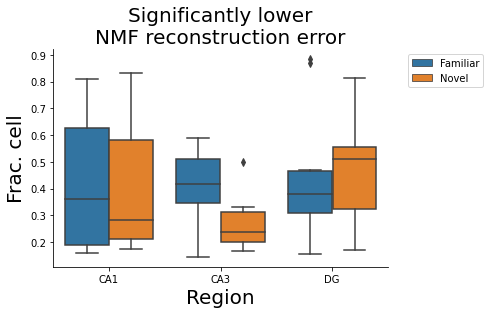

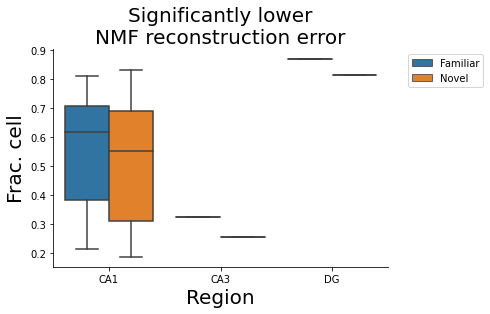

In [14]:
# 
dosave = True
day_thresh=2 # can select to filter exp with more days
for day_thresh in [0,2]:
    ma=db.groupby(['region','exp_ind']).count().iloc[:,0] > day_thresh

    

    # metric_ma=summary_all_with_metrics['si'] > summary_all_with_metrics['si'].quantile(0.8)

    # data=summary_all_with_metrics.loc[metric_ma]
    data=summary_all_with_metrics

    # gpb = summary_all.groupby(level=(0,2))
    gpb = data.groupby(level=(0,1,2))
    frac_sig_per_sess=gpb['issig'].mean()


    frac_sig_per_sess=frac_sig_per_sess.loc[ma]

    frac_sig_per_sess=frac_sig_per_sess.reset_index().rename({'level_0':'region','level_1':'exp','level_2':'isnovel'},axis=1)

    frac_sig_per_sess['isnovel_str']=frac_sig_per_sess['isnovel'].apply(lambda x:['Familiar','Novel'][x])


    fig,ax=plt.subplots()
    ax=sns.boxplot(data=frac_sig_per_sess,x='region',y='issig',hue='isnovel_str',ax=ax)
    l=ax.get_legend()
    l.set_title(None)
    l.set_bbox_to_anchor([1.3,1.])
    # sns.pointplot(data=frac_sig_per_sess,x='region',y='issig',hue='isnovel')
    ax.set(ylabel='Frac. cell',xlabel='Region',title='Significantly lower\nNMF reconstruction error')
    sns.despine()

    if dosave:
        for fmt in ['svg','png']:
            fig_fn = f'frac_cell_with_sig_lower_nmf_recon_day_thresh{day_thresh}.{fmt}'
            fig_fn_full = os.path.join(figdir,fig_fn)
            fig.savefig(fig_fn_full,bbox_inches='tight')



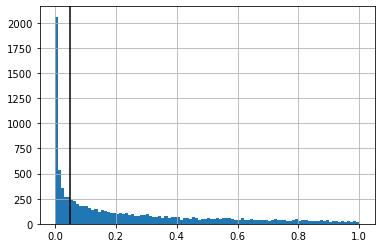

In [118]:
region='CA1'
isnovel=0
ax=summary_all_with_metrics.loc[region,slice(None),isnovel]['p'].hist(bins=100)
ax.axvline(pthresh,color='k')

# show pipeline and individual examples

In [13]:
import reuse_block_analysis as rba

In [18]:
region='CA1'
exp=0
isnovel=0
summary_all_with_metrics_sub=summary_all_with_metrics.loc[region,exp,isnovel]
summary_all_with_metrics_sub=summary_all_with_metrics_sub.query('issig&si>1.')
ii=11
row=summary_all_with_metrics_sub.iloc[ii]
print(row)
uid=row.name

null_ci_low    0.502077
null_ci_up     0.680637
null_mean      0.619595
p                 0.002
recon           0.44536
si             2.313037
fr_cv           1.38458
mean_fr         0.03429
sparsity       7.379609
issig              True
Name: 45, dtype: object


In [19]:
region='CA3'#'CA1'
exp=0
isnovel=1#0
uid=21#64
get_field_day=3

In [20]:
X_df = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')
X_df = X_df.fillna(axis=0,method='ffill')

In [233]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/projects/nmf_analysis/unimodal_nmf.py:394: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


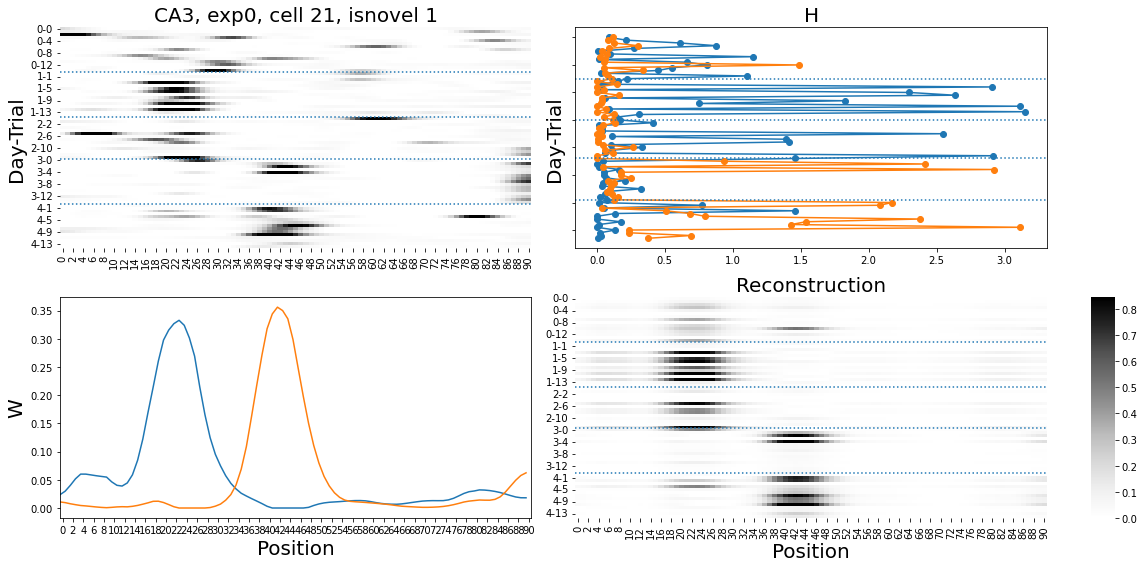

In [ ]:
#normal nmf
reload(unmf)

ind_selected,recon_l = unmf.pick_nmf_rank_one_neuron(X_df,rank_l=range(1,5))
n_components = ind_selected

W_hat_ma,H_hat_ma,X_hat,recon = unmf.do_nmf_wrapper(X_df,n_components=n_components,norm_H=None,norm_W='norm')
reload(unmf)
fig=unmf.plot_ratemap_and_wh(X_df,W_hat_ma,H_hat_ma,X_hat=X_hat,
                                region=region,exp=exp,isnovel=isnovel,uid=uid)
# fig,ax=ph.heatmap(X_df_.T)
# ph.plot_day_on_heatmap(X_df_.T,ax=ax)

/mnt/home/szheng/projects/nmf_analysis/unimodal_nmf.py:394: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


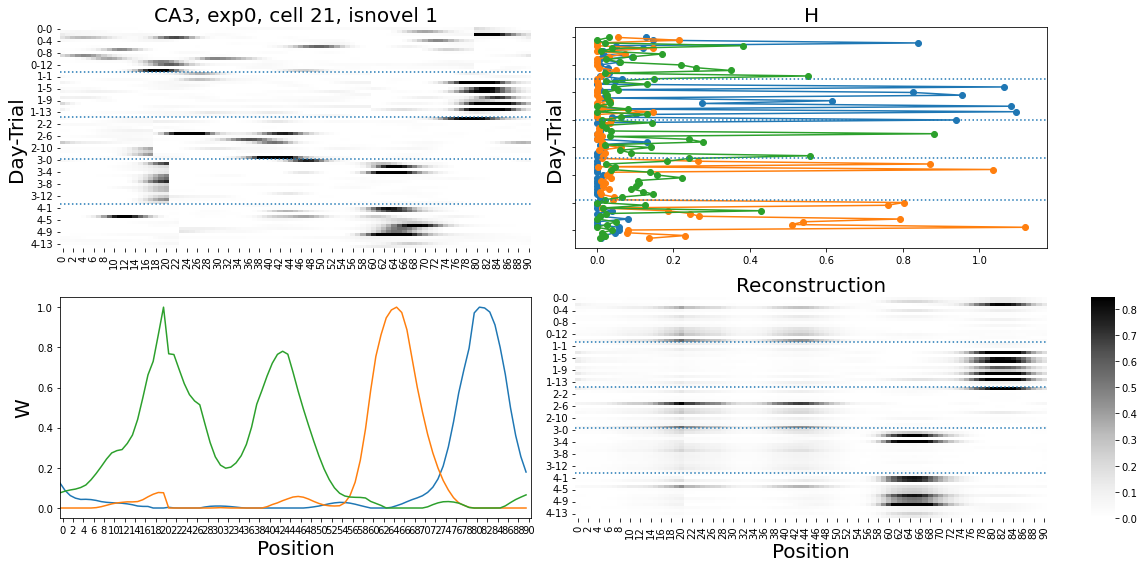

In [26]:
n_roll_min=10
recon_null_l=[]

X_df_null=rba.shuffle_all_day(X_df,min_roll=n_roll_min)
W_hat_ma_null, H_hat_ma_null,X_hat_null, recon_null = unmf.do_nmf_wrapper(X_df_null,n_components=n_components)
    # H_hat_ma_null_l.append(H_hat_ma_null)

fig=unmf.plot_ratemap_and_wh(X_df_null,W_hat_ma_null,H_hat_ma_null,X_hat=X_hat_null,
                                region=region,exp=exp,isnovel=isnovel,uid=uid)

    

In [201]:


import warnings
warnings.filterwarnings('ignore')


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(<Figure size 432x288 with 1 Axes>, <Axes: >)

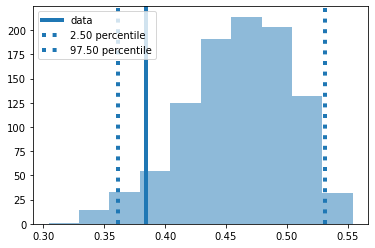

In [27]:
res_one,recon_null_l=rba.nmf_pick_rank_shuffle_one_neuron(X_df,rank_l=range(1,5),nrepeats=1000,alpha=0.05,n_roll_min=10)

ph.plot_shuffle_data_dist_with_thresh(recon_null_l,res_one['recon'],plot_ci_low=True)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Inc

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [143]:
res_one['']

recon          0.535133
p              0.256000
null_mean      0.559203
null_ci_up     0.624453
null_ci_low    0.444348
dtype: float64

In [54]:
frac_sig_per_sess.query('region=="CA1"')

,region,exp,isnovel,issig
0,CA1,0,0,0.317073
1,CA1,0,1,0.207317
2,CA1,1,0,0.132124
3,CA1,1,1,0.132124
4,CA1,3,0,0.140823
5,CA1,3,1,0.175633
6,CA1,4,0,0.146635
7,CA1,4,1,0.170673
8,CA1,5,0,0.144112
9,CA1,5,1,0.156415
